In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
%matplotlib inline

In [2]:
%store -r pltCellColors
def colorerXTicks(gAX,fSize=12):
    xlabels=gAX.get_xticklabels()
    for xlabel in xlabels:
        xtext=xlabel.get_text()
        xlabel.set_backgroundcolor(pltCellColors[xtext])
        xlabel.set_family("monospace")

In [3]:
repIMM21="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/L4L/IMM21/"
pd.read_pickle(repIMM21+"Comparaisons-Swim-L4L-Flexique.pkl")["nb precision rappel".split(" ")]

nb  precision     rappel
echantillon paradigme swim  space                                
00          Mor       Swim1 Stems  169327.0  99.025958  73.610310
                            Forms  169327.0  99.068611  70.534303
                      Swim2 Stems  169327.0  98.806362  77.563068
                            Forms  169327.0  98.864190  76.135640
            Syn       Swim1 Stems  169327.0  98.946817  61.691090
                            Forms  169327.0  99.011798  58.606151
                      Swim2 Stems  169327.0  98.860812  70.550986
                            Forms  169327.0  98.906142  69.496779
01          Mor       Swim1 Stems  153796.0  99.306519  82.816217
                            Forms  153796.0  99.331714  81.468319
                      Swim2 Stems  153796.0  99.273023  90.112096
                            Forms  153796.0  99.276421  89.766623
            Syn       Swim1 Stems  153796.0  99.288525  75.496230
                            Forms  153796.0  99.315887  73.294668
                      Swim2 Stems  153796.0  99.248920  84.257957
                            Forms  153796.0  99.264180  83.444272
02          Mor       Swim1 Stems  201225.0  99.262042  73.765096
                            Forms  201225.0  99.365469  67.806706
                      Swim2 Stems  201225.0  98.993464  85.419056
                            Forms  201225.0  99.054583  82.641662
            Syn       Swim1 Stems  201225.0  99.418587  49.254468
                            Forms  201225.0  99.450259  45.963652
                      Swim2 Stems  201225.0  99.143187  67.766679
                            Forms  201225.0  99.173696  66.190935

In [4]:
dfL=pd.read_pickle(repIMM21+"IMM21-00.pkl")
dfL.head()

,ortho,phono,lexeme,freq,case,freqcum,tir1
0,évider,Evidâ,évider,1,pP,1,1
1,évider,Evide,évider,1,inf,1,1
2,évider,Evid,évider,1,pi3P,1,1
3,évider,Evide,évider,1,ppMS,1,1
4,réinstaller,rEêstale,réinstaller,1,inf,1,1


In [5]:
print ("nombre de lexèmes :",len(dfL.lexeme.unique()))
print ("nombre théorique de formes :",len(dfL.lexeme.unique())*51)
print ("nombre pratique de formes :", len(dfL))
print ("nombre de formes par lexeme :", float(len(dfL))/len(dfL.lexeme.unique()))

nombre de lexèmes : 4803
nombre théorique de formes : 244953
nombre pratique de formes : 51076
nombre de formes par lexeme : 10.634186966479284


In [6]:
dfNb=dfL.groupby("lexeme")[["case"]].count()
dfNb[(dfNb.case<4) & (~dfNb.index.str.endswith("er"))].head(50)

,case
lexeme,
abasourdir,3
accroire,1
affermir,2
agonir,1
aguerrir,2
ahurir,2
alunir,2
amaigrir,1
amerrir,2


In [36]:
dfCellForms=dfL.groupby("case")[["lexeme"]].count()
dfCellForms.columns=["Syntaxique"]
print (len(dfCellForms))
dfCellForms.head()


51


,Syntaxique
case,
ai1P,39
ai1S,197
ai2P,6
ai2S,57
ai3P,356
ai3S,1031
fi1P,654
fi1S,1218
fi2P,719


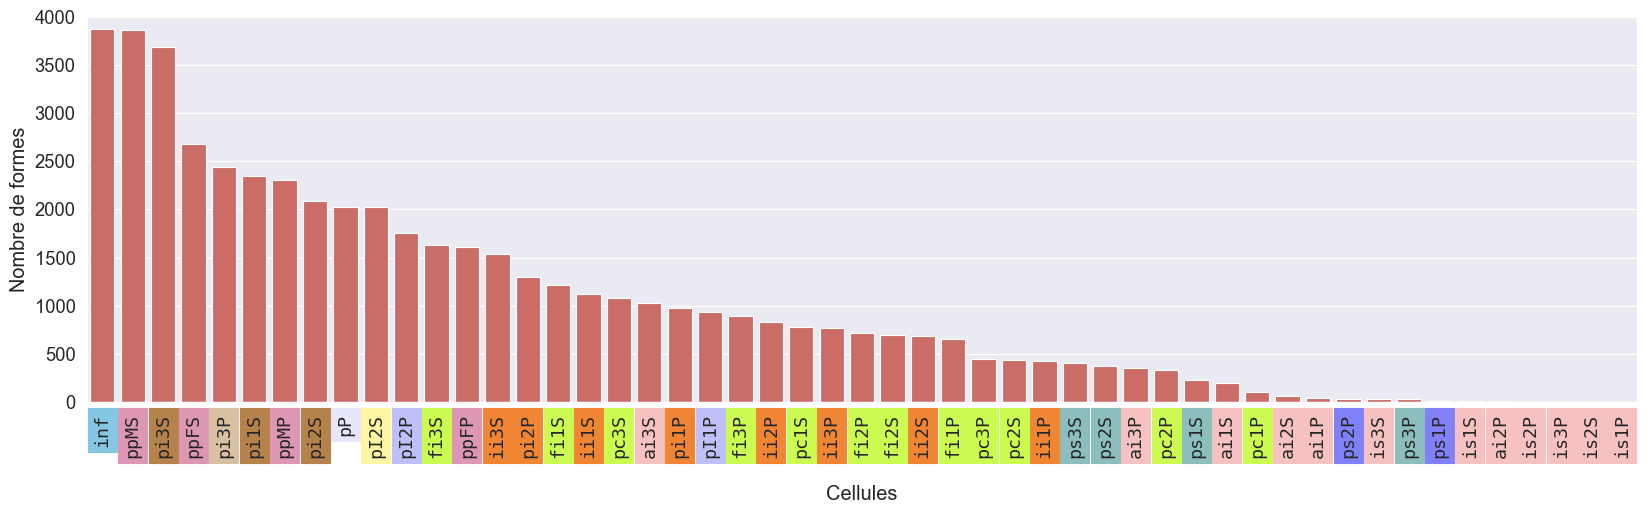

In [8]:
# ax=dfFormVerbs.plot(kind="bar",title="Number of verbs with n forms")
ax=sns.barplot(dfCellForms["Syntaxique"].sort_values(ascending=False))
# ax.set_title("Syntaxique")
ax.set_xlabel("\nCellules")
ax.set_ylabel("Nombre de formes")
_=ax.set_ylim(0,4000)
colorerXTicks(ax,fSize=10)
ax.tick_params(axis='x', labelrotation=90)
ax.figure.set_size_inches(20,5)
plt.savefig(repIMM21+"IMM21-00-DistFormCells.pdf",dpi=300, bbox_inches = "tight")


In [38]:
dfCellForms["Syntaxique"].sort_values(ascending=False).to_dict()

{'inf': 3870,
 'ppMS': 3866,
 'pi3S': 3688,
 'ppFS': 2677,
 'pi3P': 2439,
 'pi1S': 2347,
 'ppMP': 2309,
 'pi2S': 2084,
 'pP': 2027,
 'pI2S': 2023,
 'pI2P': 1757,
 'fi3S': 1635,
 'ppFP': 1608,
 'ii3S': 1536,
 'pi2P': 1301,
 'fi1S': 1218,
 'ii1S': 1123,
 'pc3S': 1080,
 'ai3S': 1031,
 'pi1P': 974,
 'pI1P': 932,
 'fi3P': 896,
 'ii2P': 826,
 'pc1S': 782,
 'ii3P': 769,
 'fi2P': 719,
 'fi2S': 694,
 'ii2S': 686,
 'fi1P': 654,
 'pc3P': 444,
 'pc2S': 436,
 'ii1P': 426,
 'ps3S': 407,
 'ps2S': 373,
 'ai3P': 356,
 'pc2P': 329,
 'ps1S': 231,
 'ai1S': 197,
 'pc1P': 108,
 'ai2S': 57,
 'ai1P': 39,
 'ps2P': 29,
 'is3S': 28,
 'ps3P': 26,
 'ps1P': 11,
 'is1S': 10,
 'ai2P': 6,
 'is2P': 4,
 'is3P': 3,
 'is2S': 3,
 'is1P': 2}

In [9]:
dfFormVerbs=dfL.groupby("lexeme")[["case","tir1"]].count().groupby("case").agg(Syntaxique=("tir1","count"))
dfFormVerbs.index.name="nb_forms"
dfFormVerbs

,Syntaxique
nb_forms,
1,604
2,442
3,387
4,338
5,276
6,262
7,210
8,178
9,153


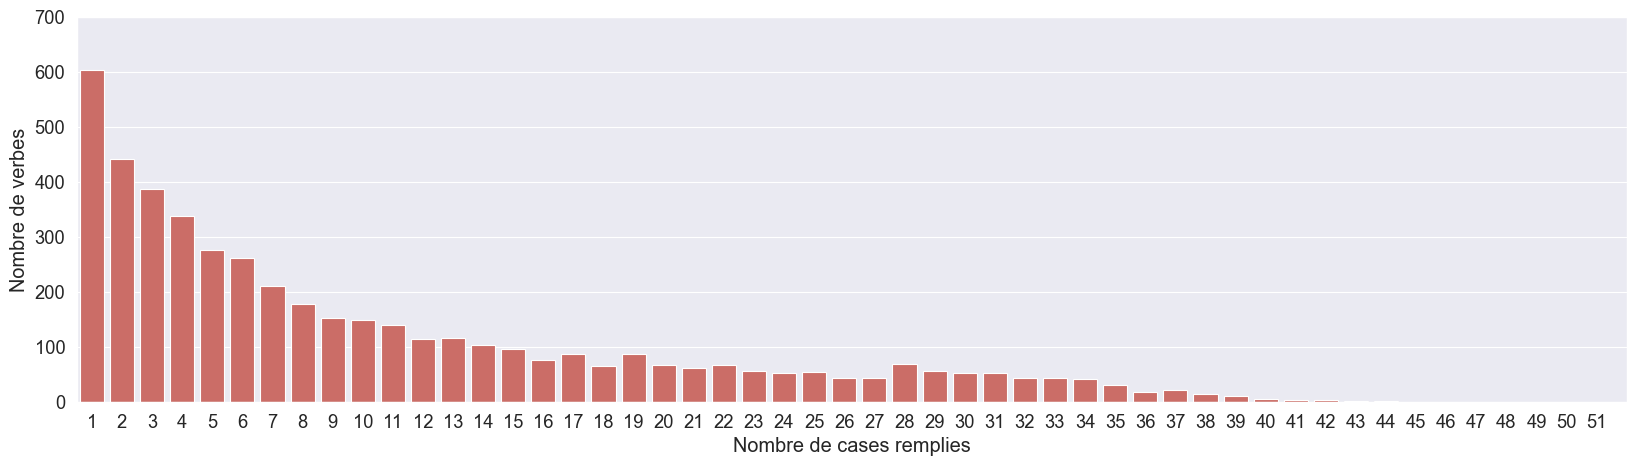

In [41]:
# ax=dfFormVerbs.plot(kind="bar",title="Number of verbs with n forms")
ax=sns.barplot(dfFormVerbs["Syntaxique"])
ax.set_xlabel("Nombre de cases remplies")
ax.set_ylabel("Nombre de verbes")
ax.set_xticks(range(0,51))
ax.set_xticklabels(range(1,52))
_=ax.set_ylim(None,700)
_=ax.set_xlim(None,51)
ax.figure.set_size_inches(20,5)
plt.savefig(repIMM21+"IMM21-00-DistVerbNbForms.pdf",dpi=300, bbox_inches = "tight")

# Morphomes

In [39]:
dfM=pd.read_pickle(repIMM21+"IMM21-00-X-Morphomes.pkl")
dfM.head()

,lexeme,phono,case,morphome,freq,tir1
0,évider,Evidâ,pP,pP,1,1
1,évider,Evide,inf,inf,1,1
2,évider,Evid,pi3P,pi3P,1,1
3,évider,Evide,ppMS,ppMP/ppMS,1,1
4,réinstaller,rEêstale,inf,inf,1,1


In [40]:
dfM.morphome.unique()

array(['pP', 'inf', 'pi3P', 'ppMP/ppMS', 'pi1S', 'ppFS/ppFP', 'pi2S/pi3S',
       'pI2S', 'ai3S/ai2S/is3S', 'pI1P', 'pc2P', 'pi1P', 'ii1P', 'fi2P',
       'pI2P', 'pc1P', 'ai1P', 'ai1S', 'ai3P', 'ii2P', 'pi2P',
       'fi2S/fi3S', 'fi3P/fi1P', 'pc2S/pc3S/pc3P/pc1S/fi1S',
       'ii1S/ii3S/ii2S/ii3P', 'ps3S/ps3P/ps2S/ps1S', 'ps2P', 'is2S/is1S',
       'is3P/is1S', 'ps1P', 'ai2P', 'is2P', 'is1P'], dtype=object)

In [13]:
cols=dfM.columns.tolist()
otherCols=cols[:]
otherCols.remove("morphome")
otherCols

['lexeme', 'phono', 'case', 'freq', 'tir1']

In [14]:
dfM=dfM.set_index(otherCols).apply(lambda x: x.str.split('[/]').explode()).reset_index()[cols]

In [15]:
dfM.head()

,lexeme,phono,case,morphome,freq,tir1
0,évider,Evidâ,pP,pP,1,1
1,évider,Evide,inf,inf,1,1
2,évider,Evid,pi3P,pi3P,1,1
3,évider,Evide,ppMS,ppMP,1,1
4,évider,Evide,ppMS,ppMS,1,1


In [16]:
print ("nombre de lexèmes :",len(dfL.lexeme.unique()))
print ("nombre théorique de formes :",len(dfL.lexeme.unique())*51)
print ("")
print ("Paradigme syntaxique")
print ("nombre pratique de formes :", len(dfL))
print ("nombre de formes par lexeme :", float(len(dfL))/len(dfL.lexeme.unique()))
print ("nombre de formes à prédire :",len(dfL.lexeme.unique())*51-len(dfL))
print ("")
print ("Paradigme morphomique")
print ("nombre pratique de formes :", len(dfM))
print ("nombre de formes par lexeme :", float(len(dfM))/len(dfM.lexeme.unique()))
print ("Morphomique - Syntaxique :",len(dfM)-len(dfL))
print ("nombre de formes à prédire :",len(dfL.lexeme.unique())*51-len(dfM))

nombre de lexèmes : 4803
nombre théorique de formes : 244953

Paradigme syntaxique
nombre pratique de formes : 51076
nombre de formes par lexeme : 10.634186966479284
nombre de formes à prédire : 193877

Paradigme morphomique
nombre pratique de formes : 67096
nombre de formes par lexeme : 13.969602331875912
Morphomique - Syntaxique : 16020
nombre de formes à prédire : 177857


In [17]:
dfCellForms["Morphomique"]=dfM.groupby("morphome")[["lexeme"]].count()
dfCellForms.head()
print (len(dfCellForms))

51


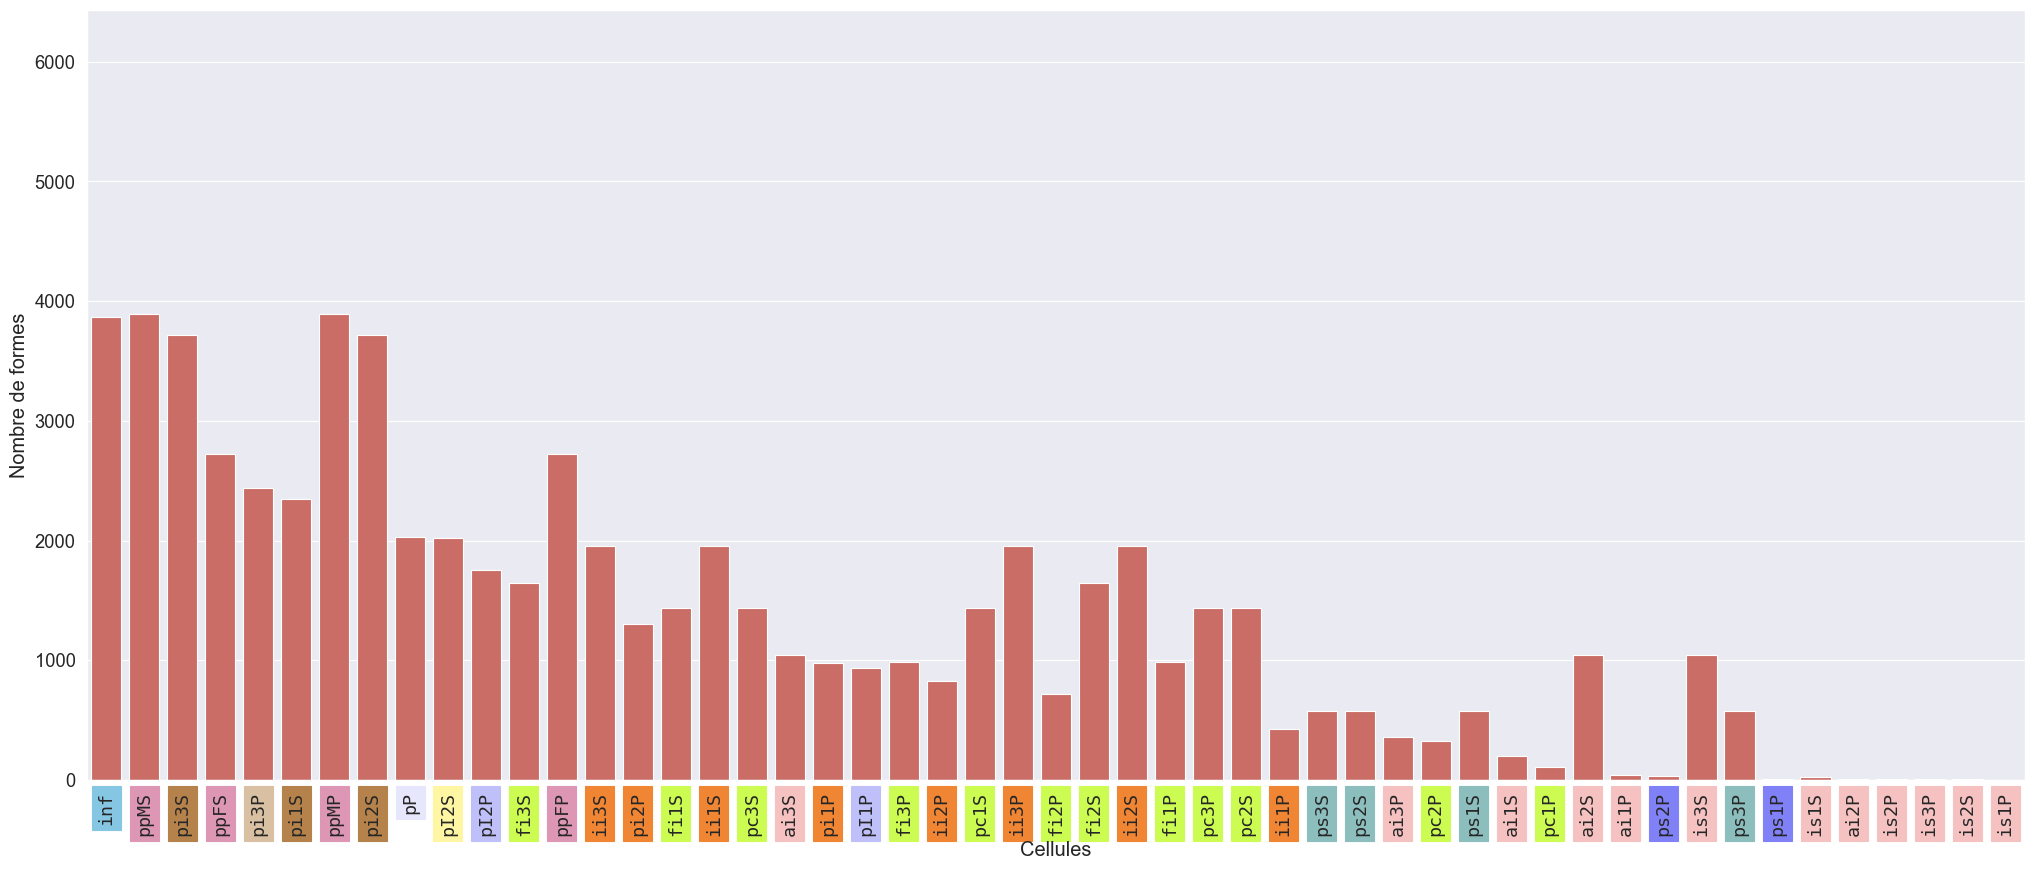

In [18]:
# ax=dfFormVerbs.plot(kind="bar",title="Number of verbs with n forms")
ax=sns.barplot(dfCellForms.sort_values(by="Syntaxique",ascending=False)["Morphomique"])
ax.set_xlabel("Cellules")
ax.set_ylabel("Nombre de formes")
_=ax.set_ylim(0,6433)
colorerXTicks(ax,fSize=10)
ax.tick_params(axis='x', labelrotation=90)
ax.figure.set_size_inches(25,10)

In [19]:
df=dfCellForms.sort_values(by="Syntaxique",ascending=False).reset_index()
# df

In [20]:
%store -r ordStemCells
df=dfCellForms.T[ordStemCells].T.reset_index()
df

,case,Syntaxique,Morphomique
0,pi1S,2347,2347
1,pi2S,2084,3720
2,pi3S,3688,3720
3,pi1P,974,974
4,pi2P,1301,1301
5,pi3P,2439,2439
6,ii1S,1123,1952
7,ii2S,686,1952
8,ii3S,1536,1952
9,ii1P,426,426


In [21]:
dfMelted = pd.melt(df, id_vars=['case'],value_vars=['Syntaxique','Morphomique'])
dfMelted.columns=["case","paradigme","nombre"]

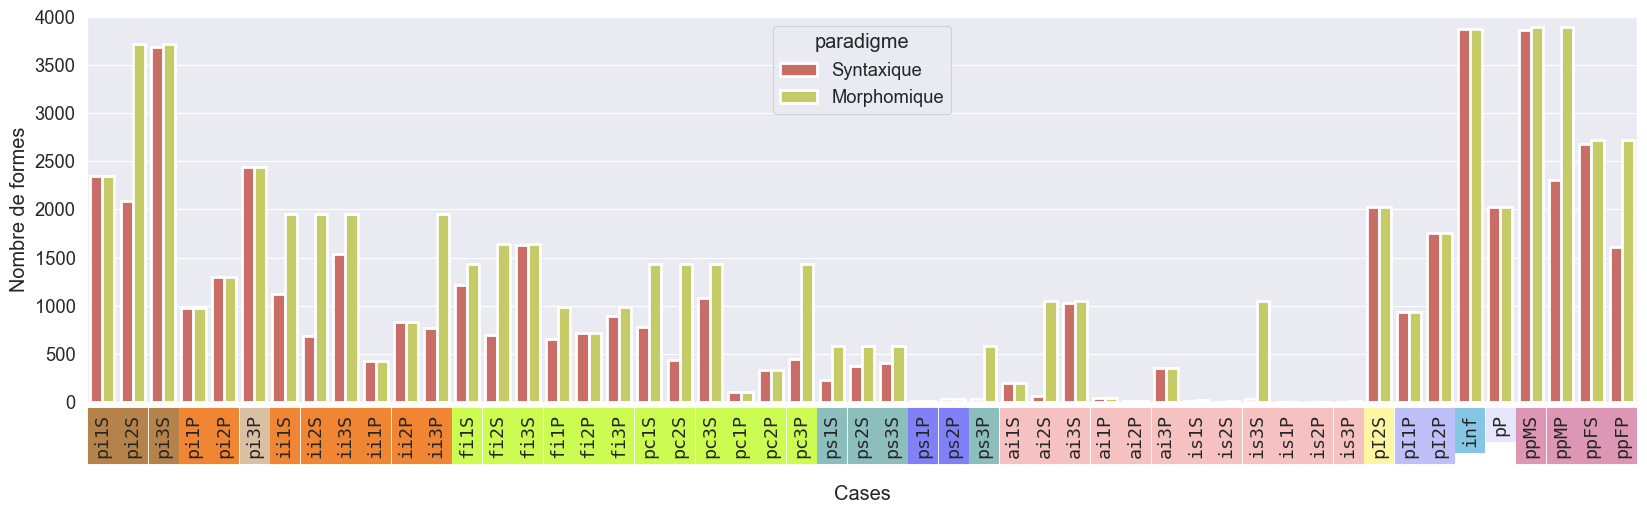

In [33]:
ax = sns.barplot(x="case", y="nombre", hue="paradigme", data=dfMelted,linewidth=2)#,palette=["blue","orange"])
ax.set_xlabel("\nCases")
ax.set_ylabel("Nombre de formes")
# ax.set_title("Remplissage initial")
_=ax.set_ylim(0,4000)
# _=ax.set_xlim("inf","is1P")
colorerXTicks(ax,fSize=10)
ax.tick_params(axis='x', labelrotation=90)
ax.figure.set_size_inches(20,5)
plt.savefig('CMLF-FormesCases.pdf',dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
df=dfM.groupby("lexeme")[["case","tir1"]].count().groupby("case").agg(Morphomique=("tir1","count"))
df["Syntaxique"]=dfFormVerbs["Syntaxique"]
df=df.reset_index()
df.columns=["nb_forms","Morphomique","Syntaxique"]

In [ ]:
dfMelted = pd.melt(df, id_vars=['nb_forms'],value_vars=['Syntaxique','Morphomique'])
dfMelted.columns=["formes","paradigme","verbes"]

In [ ]:
ax = sns.lineplot(x="formes", y="verbes", hue="paradigme", data=dfMelted,linewidth=2)#,palette=["blue","orange"])
ax.set_xlabel("Nombre de cases remplies")
ax.set_ylabel("Nombre de verbes")
ax.set_title("Nombre de verbes en fonction du nombre de cases remplies")
ax.set(xticks=range(1,52))
_=ax.set_ylim(0,700)
_=ax.set_xlim(1,51)
ax.figure.set_size_inches(20,5)
plt.savefig('CMLF-VerbesFormes.pdf')
plt.show()